# Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [5]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
# from getCitiBikeCSV import getCitiBikeCSV

import scipy.stats

%pylab inline

import zipfile
import os
import io
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

def getCitiBikeCSV(datestring):
    basename = '{}-citibike-tripdata'.format(datestring)
    url = 'https://s3.amazonaws.com/tripdata/{}.zip'.format(basename)
    csv_filename = '{}.csv'.format(basename)
    cache_path = os.path.join(os.getenv('PUIDATA', './'), csv_filename)
    
    # Load file from either url or cache
    if os.path.isfile(cache_path):
        print('Loading from local csv file')
        df = pd.read_csv(cache_path)

    else:
        print('Loading from aws')
        # Get zip buffer
        remotezip = urllib.urlopen(url).read()

        # Open in memory
        with zipfile.ZipFile(io.BytesIO(remotezip)) as z:
            # Read the filename or the first file if there are naming inconsistencies
            zip_file_to_read = csv_filename if csv_filename in z.namelist() else z.namelist()[0]
            df = pd.read_csv(z.open(zip_file_to_read))

        # Save dataframe as cached 
        df.to_csv(cache_path)
    return df


#this makes my plots pretty! but it is totally not mandatory to do it
# import json
# s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

# Significance threshold
alpha = 0.05

Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [51]:
datestring = '201501'
df = getCitiBikeCSV(datestring).drop('Unnamed: 0', axis=1)
df.head()

Loading from local csv file


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [52]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the trip duration for trips starting before 6pm and trips starting at or after 6pm**
$$ \alpha = 0.05 $$

In [53]:
#df is the dataframe where the content of the csv file is stored
df['is_day'] = df['date'].dt.hour < 18
# dropping NaN values
df['is_day'].dropna(inplace=True)
df[['is_day', 'date']].sample(5)

,is_day,date
103988,True,2015-01-13 08:56:00
147686,True,2015-01-16 13:53:00
59295,True,2015-01-07 17:48:00
46751,True,2015-01-06 09:48:00
136314,True,2015-01-15 17:30:00


In [54]:
df['dayduration'] = df['tripduration'][df['is_day'] == 1]
df['nightduration'] = df['tripduration'][df['is_day'] == 0]

In [55]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,dayduration,nightduration
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,212633.000000,72919.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,663.295124,628.170257
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,882.669047,951.134251
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,60.000000,60.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000,336.000000,328.000000
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,1977.000000,1.000000,507.000000,493.000000
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,1984.000000,1.000000,780.000000,748.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,43023.000000,42896.000000


Woah! The max value for `tripduration` is extremely high. Quantiles will be used to filter out the outliers.

In [56]:
df = df[df['tripduration'] < df['tripduration'].quantile(0.99)]
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,dayduration,nightduration
count,282694.000000,282694.000000,282694.000000,282694.000000,282694.000000,282694.000000,282694.000000,282694.000000,277813.000000,282694.000000,210246.000000,72448.000000
mean,604.778358,442.535537,40.735820,-73.990199,439.514277,40.735613,-73.990419,18147.741834,1974.968014,1.165126,610.762283,587.412848
std,391.227666,330.199165,0.018714,0.011659,323.902519,0.018661,0.011720,2065.256344,11.569378,0.415763,396.921626,373.673929
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,60.000000,60.000000
25%,332.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000,334.000000,327.000000
50%,500.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990697,18149.000000,1977.000000,1.000000,503.000000,490.000000
75%,760.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981918,19903.000000,1984.000000,1.000000,766.000000,741.000000
max,2406.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,2406.000000,2406.000000


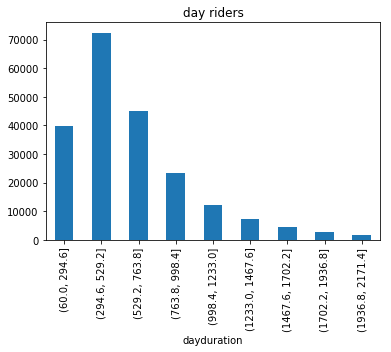

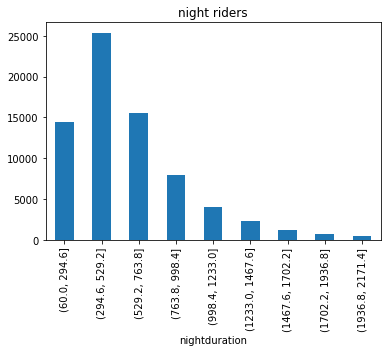

In [64]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
tdmin, tdmax = df.tripduration.min(), df.tripduration.max()
bins = np.arange(tdmin, tdmax, (tdmax-tdmin)/10)
axM = df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("day riders")
axF = df.nightduration.groupby(pd.cut(df.nightduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("night riders");


**Figure 1: histogrammed distribution of riders' trip duration separated by night/day.** This shows the distribution of the two variables to be tested. Notice that their peaks appear to occur in the same location, only their scales are different.

                  count_nonzero
dayduration                    
(60.0, 294.6]          0.010122
(294.6, 529.2]         0.015534
(529.2, 763.8]         0.015558
(763.8, 998.4]         0.015160
(998.4, 1233.0]        0.012792
(1233.0, 1467.6]       0.009837
(1467.6, 1702.2]       0.005488
(1702.2, 1936.8]       0.001783
(1936.8, 2171.4]       0.000000


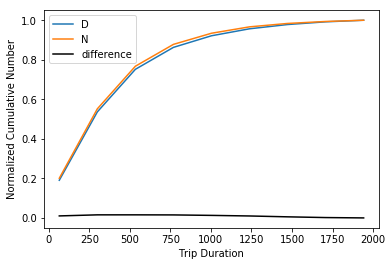

In [65]:
csD=df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).cumsum()

csN=df.nightduration.groupby(pd.cut(df.nightduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2:** the cumulative distribution of CitiBike riders' travel durations by daytime/nighttime. This shows the difference between the normalized cumulative sums. This is used in the KS test.

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [71]:
ks = scipy.stats.ks_2samp(df.dayduration, df.nightduration)
print (ks)
print(ks.pvalue)

Ks_2sampResult(statistic=0.48744578944017203, pvalue=0.0)
0.0


#### Evaluation
Because the p-value is small (and doesn't seem to have more than one significant figure?) the null hypothesis can be rejected.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

**H_0:** There is no strong correlation between nighttime and daytime trip durations.

In [77]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
sample_size = min(len(df[df['is_day'] == 1]), len(df[df['is_day'] == 0])) / 200
x = df['tripduration'][df['is_day'] == 1].sample(int(sample_size)).values
y = df['tripduration'][df['is_day'] == 0].sample(int(sample_size)).values

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [78]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

r, p = scipy.stats.pearsonr(x, y)
print('Correlation Coefficient: {}'.format(r))
print('P-value: {}'.format(p))
print('Reject Null Hypothesis? {}'.format('Yes' if p < alpha else 'No'))

Correlation Coefficient: 0.011180624930162404
P-value: 0.7173175677251469
Reject Null Hypothesis? No


The correlation coefficient is close to zero, implying no correlation. The Pearson test gives a high p-value meaning that the null hypothesis cannot be rejected.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [80]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

r, p = scipy.stats.spearmanr(x, y)
print('Correlation Coefficient: {}'.format(r))
print('P-value: {}'.format(p))
print('Reject Null Hypothesis? {}'.format('Yes' if p < alpha else 'No'))

Correlation Coefficient: 0.024317625446565936
P-value: 0.4309689936049502
Reject Null Hypothesis? No


The correlation coefficient is close to zero, implying no correlation. The Spearman test gives a high p-value meaning that the null hypothesis cannot be rejected.

## 2) Age of bikers for trips originating in Manhattan and in Brooklyn

In [6]:
# Treating this like a separate notebook
import geopandas as gpd
from shapely.geometry import Point

In [10]:
datestring = '201501'
df = getCitiBikeCSV(datestring).drop('Unnamed: 0', axis=1)

# Convert date column
df.head()

Loading from local csv file


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [11]:
boroughs = gpd.read_file('Borough Boundaries/geo_export_9dda910d-89e9-43ca-9271-55e8df03c5cd.shp')
boroughs

,shape_leng,boro_name,boro_code,shape_area,geometry
0,895732.898001,Queens,4.0,3.044822e+09,(POLYGON ((-73.83668274106707 40.5949466970158...
1,330694.929182,Staten Island,5.0,1.623818e+09,(POLYGON ((-74.05050806403247 40.5664220341608...
2,464417.585525,Bronx,2.0,1.186671e+09,(POLYGON ((-73.89680883223774 40.7958084451597...
3,741109.423748,Brooklyn,3.0,1.937487e+09,(POLYGON ((-73.86706149472118 40.5820879767934...
4,358410.590999,Manhattan,1.0,6.364538e+08,(POLYGON ((-74.01092841268031 40.6844914725429...


In [12]:
gdf = gpd.sjoin(
    gpd.GeoDataFrame(
        df, crs={'init': 'epsg:4326'},
        geometry=[
            Point([lng, lat]) 
            for lng, lat in df[['start station longitude', 'start station latitude']].values
        ]),
    boroughs[boroughs['boro_name'].isin(['Manhattan', 'Brooklyn'])], how='inner'
)
gdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,geometry,index_right,shape_leng,boro_name,boro_code,shape_area
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,18660,Subscriber,1960.0,2,POINT (-73.96905301 40.75001986),4,358410.590999,Manhattan,1.0,6.364538e+08
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,...,16085,Subscriber,1963.0,1,POINT (-74.00366443 40.74317449),4,358410.590999,Manhattan,1.0,6.364538e+08
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,...,20845,Subscriber,1974.0,1,POINT (-73.98602212999999 40.74096374),4,358410.590999,Manhattan,1.0,6.364538e+08
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,...,20197,Subscriber,1977.0,1,POINT (-73.98683077 40.7451677),4,358410.590999,Manhattan,1.0,6.364538e+08
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,...,20788,Subscriber,1969.0,2,POINT (-73.99839279 40.7500727),4,358410.590999,Manhattan,1.0,6.364538e+08


In [13]:
gdf['age'] = 2015 - gdf['birth year'][gdf['usertype'] == 'Subscriber']
gdf['age_mh'] = gdf['age'][gdf['boro_name'] == 'Manhattan']
gdf['age_bk'] = gdf['age'][gdf['boro_name'] == 'Brooklyn']

In [14]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,1977.000000,1.000000
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,1984.000000,1.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000


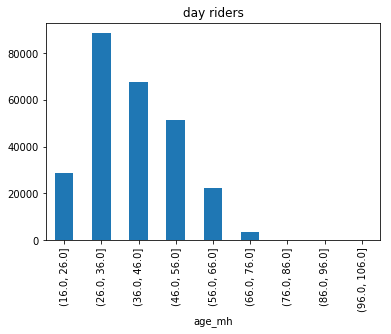

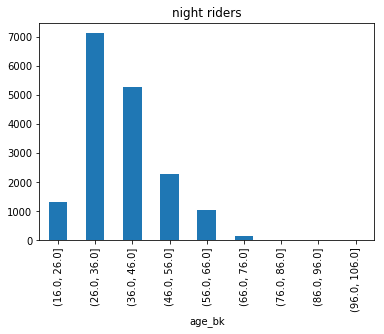

In [16]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
agemin, agemax = gdf.age.min(), gdf.age.max()
bins = np.arange(agemin, agemax, (agemax-agemin)/10)
axM = gdf.age_mh.groupby(pd.cut(gdf.age_mh, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("day riders")
axF = gdf.age_bk.groupby(pd.cut(gdf.age_bk, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("night riders");

**Figure 1: histogrammed distribution of riders' age separated by their start location (Manhattan/Brooklyn).** This shows the distribution of the two variables to be tested. Notice that their peaks appear to occur in the same location, only their scales are different.

               count_nonzero
age_mh                      
(16.0, 26.0]        0.031639
(26.0, 36.0]        0.046366
(36.0, 46.0]        0.094827
(46.0, 56.0]        0.031289
(56.0, 66.0]        0.006320
(66.0, 76.0]        0.000670
(76.0, 86.0]        0.000114
(86.0, 96.0]             NaN
(96.0, 106.0]            NaN


/Users/bensteers/Desktop/Storage/NYU/Fall2017/PUI/.direnv/python-3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


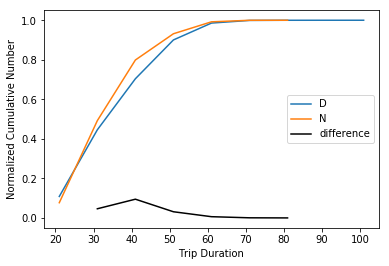

In [18]:
csM=gdf.age_mh.groupby(pd.cut(gdf.age_mh, bins)).agg([count_nonzero]).cumsum()

csB=gdf.age_bk.groupby(pd.cut(gdf.age_bk, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csB / csB.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "D")
pl.plot(bins[:-1] + 5, csB / csB.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csB / csB.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2:** the cumulative distribution of CitiBike riders' age by start location (either Manhattan or Brooklyn). This shows the difference between the normalized cumulative sums. This is used in the KS test.

In [20]:
sample_size = min(len(gdf.age_mh.dropna()), len(gdf.age_bk.dropna())) / 200
x = gdf.age_mh.dropna().sample(int(sample_size)).values
y = gdf.age_bk.dropna().sample(int(sample_size)).values

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [21]:
ks = scipy.stats.ks_2samp(x, y)
print(ks)
print(ks.pvalue)

Ks_2sampResult(statistic=0.15294117647058825, pvalue=0.25121461406157541)
0.251214614062


# Pearson's  test for correlation

In [22]:
r, p = scipy.stats.pearsonr(x, y)
print('Correlation Coefficient: {}'.format(r))
print('P-value: {}'.format(p))
print('Reject Null Hypothesis? {}'.format('Yes' if p < alpha else 'No'))

Correlation Coefficient: -0.06355892392077839
P-value: 0.5633364903712181
Reject Null Hypothesis? No


The correlation coefficient is low, implying no correlation. The Pearson test gives a high p-value meaning that the null hypothesis cannot be rejected.

# Spearman's  test for correlation

In [23]:
r, p = scipy.stats.spearmanr(x, y)
print('Correlation Coefficient: {}'.format(r))
print('P-value: {}'.format(p))
print('Reject Null Hypothesis? {}'.format('Yes' if p < alpha else 'No'))

Correlation Coefficient: -0.0893490859633726
P-value: 0.41610956772271623
Reject Null Hypothesis? No


The correlation coefficient is low, implying no correlation. The Spearman test gives a high p-value meaning that the null hypothesis cannot be rejected.